In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import itertools
import copy

import sys
sys.path.append('../../')

from dim import utils


plt.rcParams["font.family"] = "serif"

In [2]:
with open('../../dim/gen_data/dmrf_tetramer_20_4.dmrf', 'rb') as f:
    dmrfs = pickle.load(f)

/home/nami/anaconda3/envs/dgm/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/nami/anaconda3/envs/dgm/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.3.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
A_A_coupling_neighbors = {}
for ne in [''.join([i[0],'_',i[1]]) for i in list(itertools.product('AGTC',repeat =2))]:
    A_A_coupling_neighbors[ne] = []
    
G_G_coupling_neighbors = copy.deepcopy(A_A_coupling_neighbors)
T_T_coupling_neighbors = copy.deepcopy(A_A_coupling_neighbors)
C_C_coupling_neighbors = copy.deepcopy(A_A_coupling_neighbors)
    
for seq_no,seq in enumerate(dmrfs.keys()):
    comp_seq = utils.complementary(seq)
    if seq[1] == 'A':
        for ne in A_A_coupling_neighbors:
            if seq[0]==ne[0] and seq[2]==ne[2]:
                [A_A_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[0,0] for i in range(len(dmrfs[seq]))]]
            if comp_seq[0]==ne[0] and comp_seq[2]==ne[2]:
                [T_T_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[3,3] for i in range(len(dmrfs[seq]))]]
    if seq[2] == 'A':
        for ne in A_A_coupling_neighbors:
            if seq[1]==ne[0] and seq[3]==ne[2]:
                [A_A_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[1,1] for i in range(len(dmrfs[seq]))]]
            if comp_seq[1]==ne[0] and comp_seq[3]==ne[2]:
                [T_T_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[2,2] for i in range(len(dmrfs[seq]))]]

for seq_no,seq in enumerate(dmrfs.keys()):
    if seq[1] == 'G':
        for ne in G_G_coupling_neighbors:
            if seq[0]==ne[0] and seq[2]==ne[2]:
                [G_G_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[0,0] for i in range(len(dmrfs[seq]))]]
            if comp_seq[0]==ne[0] and comp_seq[2]==ne[2]:
                [C_C_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[3,3] for i in range(len(dmrfs[seq]))]]
    if seq[2] == 'G':
        for ne in G_G_coupling_neighbors:
            if seq[1]==ne[0] and seq[3]==ne[2]:
                [G_G_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[1,1] for i in range(len(dmrfs[seq]))]]
            if comp_seq[1]==ne[0] and comp_seq[3]==ne[2]:
                [C_C_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[2,2] for i in range(len(dmrfs[seq]))]]

                
for seq_no,seq in enumerate(dmrfs.keys()):
    if seq[1] == 'T':
        for ne in T_T_coupling_neighbors:
            if seq[0]==ne[0] and seq[2]==ne[2]:
                [T_T_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[0,0] for i in range(len(dmrfs[seq]))]]
            if comp_seq[0]==ne[0] and comp_seq[2]==ne[2]:
                [A_A_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[3,3] for i in range(len(dmrfs[seq]))]]
    if seq[2] == 'T':
        for ne in T_T_coupling_neighbors:
            if seq[1]==ne[0] and seq[3]==ne[2]:
                [T_T_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[1,1] for i in range(len(dmrfs[seq]))]]
            if comp_seq[1]==ne[0] and comp_seq[3]==ne[2]:
                [A_A_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[2,2] for i in range(len(dmrfs[seq]))]]

                
for seq_no,seq in enumerate(dmrfs.keys()):
    if seq[1] == 'C':
        for ne in C_C_coupling_neighbors:
            if seq[0]==ne[0] and seq[2]==ne[2]:
                [C_C_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[0,0] for i in range(len(dmrfs[seq]))]]
            if comp_seq[0]==ne[0] and comp_seq[2]==ne[2]:
                [G_G_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[3,3] for i in range(len(dmrfs[seq]))]]
    if seq[2] == 'C':
        for ne in C_C_coupling_neighbors:
            if seq[1]==ne[0] and seq[3]==ne[2]:
                [C_C_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[1,1] for i in range(len(dmrfs[seq]))]]
            if comp_seq[1]==ne[0] and comp_seq[3]==ne[2]:
                [G_G_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[2,2] for i in range(len(dmrfs[seq]))]]


/home/nami/anaconda3/envs/dgm/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/nami/anaconda3/envs/dgm/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


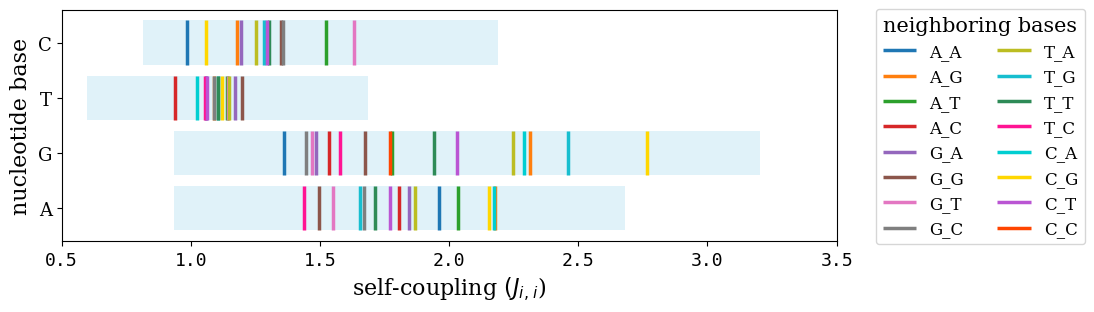

In [4]:
fig = plt.subplots(figsize=(10,3))

categories = ['A', 'G', 'T', 'C']
bottoms = [min([item for sublist in A_A_coupling_neighbors.values() for item in sublist]),
           min([item for sublist in G_G_coupling_neighbors.values() for item in sublist]), 
           min([item for sublist in T_T_coupling_neighbors.values() for item in sublist]), 
           min([item for sublist in C_C_coupling_neighbors.values() for item in sublist])]
values = [max([item for sublist in A_A_coupling_neighbors.values() for item in sublist])-bottoms[0],
           max([item for sublist in G_G_coupling_neighbors.values() for item in sublist])-bottoms[1], 
           max([item for sublist in T_T_coupling_neighbors.values() for item in sublist])-bottoms[2], 
           max([item for sublist in C_C_coupling_neighbors.values() for item in sublist])-bottoms[3]]

y_positions = [categories.index(category) for category in categories]

plt.barh(categories, values, left=bottoms, color='skyblue', alpha=0.25)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#2e8b57', '#ff1493', '#00ced1', '#ffd700', '#ba55d3', '#ff4500']
lines = []

for color, ne in zip(colors, A_A_coupling_neighbors.keys()):
    for category, start, value, y_position, coup in zip(categories, bottoms, values, y_positions,[A_A_coupling_neighbors,G_G_coupling_neighbors,T_T_coupling_neighbors,C_C_coupling_neighbors]):
        avg = np.mean(coup[ne])
        line = plt.vlines(x=avg, ymin=y_position - 0.4, ymax=y_position + 0.4, color=color, linewidth=2.5, label=ne)
    lines.append(line)


plt.xlabel('self-coupling ' +  r'$(J_i$$_,$$_i$)', fontsize=16, family='serif')
plt.ylabel('nucleotide base', fontsize=16)
plt.xlim(0.5,3.5)
plt.tick_params(axis='x', labelsize=13)
plt.xticks(fontsize=13, family='monospace')
plt.tick_params(axis='y', labelsize=13)
plt.legend(lines,A_A_coupling_neighbors.keys(),loc='upper left', bbox_to_anchor=(1.04, 1.04), ncol=2, 
           fontsize=12,title = 'neighboring bases',title_fontsize=15)


# plt.savefig("coupling.png", dpi=800, bbox_inches='tight', transparent=True)
plt.show()

In [5]:
A_A_biases_neighbors = {}
for ne in [''.join([i[0],'_',i[1]]) for i in list(itertools.product('AGTC',repeat =2))]:
    A_A_biases_neighbors[ne] = []
    
G_G_biases_neighbors = copy.deepcopy(A_A_biases_neighbors)
T_T_biases_neighbors = copy.deepcopy(A_A_biases_neighbors)
C_C_biases_neighbors = copy.deepcopy(A_A_biases_neighbors)
    
for seq_no,seq in enumerate(dmrfs.keys()):
    comp_seq = utils.complementary(seq)
    if seq[1] == 'A':
        for ne in A_A_biases_neighbors:
            if seq[0]==ne[0] and seq[2]==ne[2]:
                [A_A_biases_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[0] for i in range(len(dmrfs[seq]))]]
            if comp_seq[0]==ne[0] and comp_seq[2]==ne[2]:
                [T_T_biases_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[3] for i in range(len(dmrfs[seq]))]]
    if seq[2] == 'A':
        for ne in A_A_biases_neighbors:
            if seq[1]==ne[0] and seq[3]==ne[2]:
                [A_A_biases_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[1] for i in range(len(dmrfs[seq]))]]
            if comp_seq[1]==ne[0] and comp_seq[3]==ne[2]:
                [T_T_biases_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[2] for i in range(len(dmrfs[seq]))]]

for seq_no,seq in enumerate(dmrfs.keys()):
    if seq[1] == 'G':
        for ne in G_G_biases_neighbors:
            if seq[0]==ne[0] and seq[2]==ne[2]:
                [G_G_biases_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[0] for i in range(len(dmrfs[seq]))]]
            if comp_seq[0]==ne[0] and comp_seq[2]==ne[2]:
                [C_C_biases_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[3] for i in range(len(dmrfs[seq]))]]
    if seq[2] == 'G':
        for ne in G_G_biases_neighbors:
            if seq[1]==ne[0] and seq[3]==ne[2]:
                [G_G_biases_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[1] for i in range(len(dmrfs[seq]))]]
            if comp_seq[1]==ne[0] and comp_seq[3]==ne[2]:
                [C_C_biases_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[2] for i in range(len(dmrfs[seq]))]]

                
for seq_no,seq in enumerate(dmrfs.keys()):
    if seq[1] == 'T':
        for ne in T_T_biases_neighbors:
            if seq[0]==ne[0] and seq[2]==ne[2]:
                [T_T_biases_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[0] for i in range(len(dmrfs[seq]))]]
            if comp_seq[0]==ne[0] and comp_seq[2]==ne[2]:
                [A_A_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[3] for i in range(len(dmrfs[seq]))]]
    if seq[2] == 'T':
        for ne in T_T_coupling_neighbors:
            if seq[1]==ne[0] and seq[3]==ne[2]:
                [T_T_biases_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[1] for i in range(len(dmrfs[seq]))]]
            if comp_seq[1]==ne[0] and comp_seq[3]==ne[2]:
                [A_A_biases_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[2] for i in range(len(dmrfs[seq]))]]

                
for seq_no,seq in enumerate(dmrfs.keys()):
    if seq[1] == 'C':
        for ne in C_C_biases_neighbors:
            if seq[0]==ne[0] and seq[2]==ne[2]:
                [C_C_biases_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[0] for i in range(len(dmrfs[seq]))]]
            if comp_seq[0]==ne[0] and comp_seq[2]==ne[2]:
                [G_G_biases_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[3] for i in range(len(dmrfs[seq]))]]
    if seq[2] == 'C':
        for ne in C_C_biases_neighbors:
            if seq[1]==ne[0] and seq[3]==ne[2]:
                [C_C_biases_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[1] for i in range(len(dmrfs[seq]))]]
            if comp_seq[1]==ne[0] and comp_seq[3]==ne[2]:
                [G_G_biases_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[2] for i in range(len(dmrfs[seq]))]]


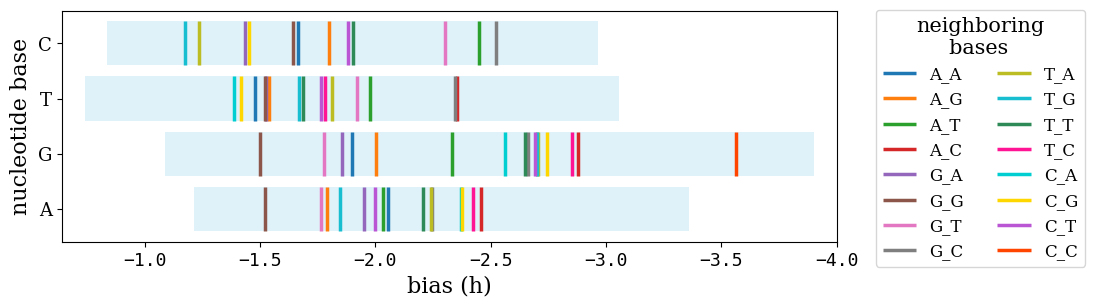

In [ ]:
fig = plt.subplots(figsize=(10,3))

categories = ['A', 'G', 'T', 'C']
bottoms = [min([item for sublist in A_A_biases_neighbors.values() for item in sublist]),
           min([item for sublist in G_G_biases_neighbors.values() for item in sublist]), 
           min([item for sublist in T_T_biases_neighbors.values() for item in sublist]), 
           min([item for sublist in C_C_biases_neighbors.values() for item in sublist])]
values = [max([item for sublist in A_A_biases_neighbors.values() for item in sublist])-bottoms[0],
           max([item for sublist in G_G_biases_neighbors.values() for item in sublist])-bottoms[1], 
           max([item for sublist in T_T_biases_neighbors.values() for item in sublist])-bottoms[2], 
           max([item for sublist in C_C_biases_neighbors.values() for item in sublist])-bottoms[3]]

y_positions = [categories.index(category) for category in categories]

plt.barh(categories, values, left=bottoms, color='skyblue', alpha=0.25)

lines = []

for color, ne in zip(colors, A_A_coupling_neighbors.keys()):
    for category, start, value, y_position, coup in zip(categories, bottoms, values, y_positions,[A_A_biases_neighbors,G_G_biases_neighbors,T_T_biases_neighbors,C_C_biases_neighbors]):
        avg = np.mean(coup[ne])
        line = plt.vlines(x=avg, ymin=y_position - 0.4, ymax=y_position + 0.4, color=color, linewidth=2.5, label=ne)
    lines.append(line)


plt.xlabel('bias (h)', fontsize=16, family='serif')
plt.ylabel('nucleotide base', fontsize=16)
plt.xlim(-0.64,-4)
plt.tick_params(axis='x', labelsize=13)
plt.xticks(fontsize=13, family='monospace')
plt.tick_params(axis='y', labelsize=13)
plt.legend(lines,A_A_coupling_neighbors.keys(),loc='upper left', bbox_to_anchor=(1.04, 1.04), ncol=2, 
           fontsize=12,title = 'neighboring\n     bases',title_fontsize=15)


# plt.savefig("bias.png", dpi=800, bbox_inches='tight', transparent=True)
plt.show()